# Lab | Customer Analysis Round 2

<font color='orange'> Dealing with the data </font>
<font color='orange'> Show the dataframe shape. </font>
<font color='orange'>Standardize header names.</font>
<font color='orange'>Which columns are numerical?</font>
<font color='orange'>Which columns are categorical?</font>\
<font color='orange'>Check and deal with NaN values.</font>

<font color='orange'>Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.</font>

<font color='orange'> BONUS: Put all the previously mentioned data transformations into a function. </font>

In [74]:
import pandas as pd
import numpy as np

In [75]:
data = pd.read_excel('marketing_customer_analysis.xlsx')

In [76]:
data

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [77]:
# Show the dataframe shape.
data.shape

(10910, 26)

In [78]:
# Standardize header names.
data.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [79]:
#los pasare todos a minusculas 
cols=[]
for i in range (len(data.columns)):
  cols.append(data.columns[i].lower())
cols

['unnamed: 0',
 'customer',
 'state',
 'customer lifetime value',
 'response',
 'coverage',
 'education',
 'effective to date',
 'employmentstatus',
 'gender',
 'income',
 'location code',
 'marital status',
 'monthly premium auto',
 'months since last claim',
 'months since policy inception',
 'number of open complaints',
 'number of policies',
 'policy type',
 'policy',
 'renew offer type',
 'sales channel',
 'total claim amount',
 'vehicle class',
 'vehicle size',
 'vehicle type']

In [80]:
#asu=igno los valores y copruebo
data.columns=cols
data.columns

Index(['unnamed: 0', 'customer', 'state', 'customer lifetime value',
       'response', 'coverage', 'education', 'effective to date',
       'employmentstatus', 'gender', 'income', 'location code',
       'marital status', 'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'total claim amount', 'vehicle class', 'vehicle size',
       'vehicle type'],
      dtype='object')

In [81]:
# Check and deal with NaN values.
print("Nulos")
for i in data.columns: 
  print( i, 100*sum(data[i].isnull()) / len(data[i]) ,"%")


Nulos
unnamed: 0 0.0 %
customer 0.0 %
state 5.783684692942255 %
customer lifetime value 0.0 %
response 5.783684692942255 %
coverage 0.0 %
education 0.0 %
effective to date 0.0 %
employmentstatus 0.0 %
gender 0.0 %
income 0.0 %
location code 0.0 %
marital status 0.0 %
monthly premium auto 0.0 %
months since last claim 5.802016498625115 %
months since policy inception 0.0 %
number of open complaints 5.802016498625115 %
number of policies 0.0 %
policy type 0.0 %
policy 0.0 %
renew offer type 0.0 %
sales channel 0.0 %
total claim amount 0.0 %
vehicle class 5.701191567369386 %
vehicle size 5.701191567369386 %
vehicle type 50.24747937671861 %


In [82]:
#Vamos a suponer que muchos nulos es maypor al 6%
#voy a elimiar la columna vehicle type ya que le faltan mas del 50% de los datos, y a las columnas que tngan menos del 6% de los datos faltantes, los reemplazare con media, moda o mediana
columnas_drop=[]
for i in data.columns:
  if(100*sum(data[i].isnull()) / len(data[i]) >=6):
    columnas_drop.append(i)
data=data.drop(columnas_drop,axis=1)

In [83]:
#Corroboramos que se eliminaron las columnas con mas del 6% faltante
#que en este caso solo era vehicle type
data

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [84]:
#Buscamos las otras columnas en que tenemos que limpiar los valores nulos
for i in data.columns:
    if 100*sum(data[i].isnull()) / len(data[i]) >0:
        print(i)

state
response
months since last claim
number of open complaints
vehicle class
vehicle size


In [85]:
#en este caso eliminaremos los registros, ya que no tendria sentido poner la moda, media o mediana a este tipo de registros
data['state'].unique

<bound method Series.unique of 0           Arizona
1        California
2        Washington
3            Oregon
4            Oregon
            ...    
10905        Nevada
10906        Oregon
10907       Arizona
10908    California
10909           NaN
Name: state, Length: 10910, dtype: object>

In [86]:
#Columna state
sum(data['state'].isnull())

631

In [87]:
#revisar si todas las columnas son nulas, 
#al ver que no, pues eliminar las 631 entradas, no resolveria los problemas con los valores nulos de las diferentes columnas
data.iloc[10909]

unnamed: 0                                     10909
customer                                     IV32877
state                                            NaN
customer lifetime value                  6857.519928
response                                         NaN
coverage                                       Basic
education                                   Bachelor
effective to date                2011-01-08 00:00:00
employmentstatus                          Unemployed
gender                                             M
income                                             0
location code                               Suburban
marital status                                Single
monthly premium auto                             101
months since last claim                         31.0
months since policy inception                      1
number of open complaints                        0.0
number of policies                                 3
policy type                            Persona

In [88]:
#Para eliminar  las filas con valores nulos en una columna especificada
data=data.dropna(subset='state')
data

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,...,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize


In [89]:
#Para este caso, dado que no tienen ningun sentido asignarle media, moda o mediana, se eliminaran todas las columnas con nulo
#esto si quisiera eliminar todas las filas que tengan un nulo
#que no es el caso
#data=data.dropna()
#data

In [90]:
#Columna response
sum(data['response'].isnull())

0

In [91]:
#Obtenemos la moda de la columna response y sustituiremos los valores nulos por la moda
response_mode=data['response'].mode()
data['response']=data['response'].fillna(response_mode)

C:\Users\monik\AppData\Local\Temp\ipykernel_304\3554083520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['response']=data['response'].fillna(response_mode)


In [92]:
data['response'].unique


<bound method Series.unique of 0         No
1         No
2         No
3        Yes
4         No
        ... 
10904     No
10905     No
10906     No
10907     No
10908     No
Name: response, Length: 10279, dtype: object>

In [93]:
#Columna months since last claim
sum(data['months since last claim'].isnull())


591

In [94]:
#remplazaremos los valores nulos por la media
mslc_mean=data['months since last claim'].mean()
data['months since last claim']=data['months since last claim'].fillna(mslc_mean)

C:\Users\monik\AppData\Local\Temp\ipykernel_304\96366675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['months since last claim']=data['months since last claim'].fillna(mslc_mean)


In [95]:
data['months since last claim'].unique

<bound method Series.unique of 0         7.000000
1         3.000000
2        34.000000
3        10.000000
4        15.129851
           ...    
10904    14.000000
10905    15.129851
10906     7.000000
10907    11.000000
10908     0.000000
Name: months since last claim, Length: 10279, dtype: float64>

In [96]:
#Columna number of open complaints
sum(data['number of open complaints'].isnull())


591

In [97]:
#remplazaremos los valores nulos por la media
nooc_mean=data['number of open complaints'].mean()
data['number of open complaints']=data['number of open complaints'].fillna(nooc_mean)

C:\Users\monik\AppData\Local\Temp\ipykernel_304\2831192406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['number of open complaints']=data['number of open complaints'].fillna(nooc_mean)


In [98]:
data['number of open complaints'].unique

<bound method Series.unique of 0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.383567
           ...   
10904    0.000000
10905    0.383567
10906    0.000000
10907    0.000000
10908    4.000000
Name: number of open complaints, Length: 10279, dtype: float64>

In [99]:
#Columna vehicle class
sum(data['vehicle class'].isnull())

591

In [100]:
#eliminare los registros ya que no habria una manera correcta de rellenar los nulos aportando algo a la bd
data['vehicle class'].unique()

array(['Four-Door Car', 'SUV', 'Two-Door Car', 'Sports Car', 'Luxury Car',
       'Luxury SUV', nan], dtype=object)

In [101]:
data=data.dropna(subset='vehicle class')
data

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,31,0.383567,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,...,32,0.000000,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,40,0.383567,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,68,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,63,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize


In [102]:
#Columna vehicle size ya no tiene nulos, ta que compartia los mismos nulos que vehicle type
sum(data['vehicle size'].isnull())

0

In [103]:
#comprobamos que no haya mas nulos en nuestra base de datos
data.isnull().sum()

unnamed: 0                       0
customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [104]:
data.isnull().sum()

unnamed: 0                       0
customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [105]:
# Datetime format - Extract the months from the dataset and store in a separate column.
#  Then filter the data to show only the information for the first quarter 
#  ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [106]:
data['effective to date']

0       2011-02-18
1       2011-01-18
2       2011-02-10
3       2011-01-11
4       2011-01-17
           ...    
10904   2011-02-24
10905   2011-01-19
10906   2011-01-06
10907   2011-02-06
10908   2011-02-13
Name: effective to date, Length: 9688, dtype: datetime64[ns]

In [107]:
type(data['effective to date'])

pandas.core.series.Series

In [108]:
#Crear mi columa mes con la informacion de los meses obtenidos de effective to date, convirtiendolo a datetime, dandole formato de nombre de mex y acortandolo a 3 letras
data['month'] = pd.to_datetime(data['effective to date'], format='%m').dt.month_name().str.slice(stop=3)

C:\Users\monik\AppData\Local\Temp\ipykernel_304\1336419487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = pd.to_datetime(data['effective to date'], format='%m').dt.month_name().str.slice(stop=3)


In [109]:
data

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Feb
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Jan
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,Feb
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,Jan
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,0.383567,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,...,0.000000,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,Feb
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,0.383567,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,Jan
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,Jan
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,Feb


In [110]:
data.columns

Index(['unnamed: 0', 'customer', 'state', 'customer lifetime value',
       'response', 'coverage', 'education', 'effective to date',
       'employmentstatus', 'gender', 'income', 'location code',
       'marital status', 'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'total claim amount', 'vehicle class', 'vehicle size',
       'month'],
      dtype='object')

In [111]:
#  Then filter the data to show only the information for the first quarter 
#  ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
data[(data['month']=="Feb") | (data['month']=='Jan')]

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Feb
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Jan
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,Feb
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,Jan
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,0.383567,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,...,0.000000,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,Feb
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,0.383567,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,Jan
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,Jan
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,Feb


In [112]:
#Solo para terminar, me gustaria poner la columan month a lado de effective to date 
data=data.reindex(columns=['unnamed: 0', 'customer', 'state', 'customer lifetime value',
       'response', 'coverage', 'education', 'effective to date',
       'month', 'employmentstatus', 'gender', 'income', 'location code',
       'marital status', 'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'total claim amount', 'vehicle class', 'vehicle size'])
data

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,month,employmentstatus,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Feb,Employed,...,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Jan,Unemployed,...,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Feb,Employed,...,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Jan,Employed,...,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Jan,Medical Leave,...,31,0.383567,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Feb,Unemployed,...,32,0.000000,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Jan,Unemployed,...,40,0.383567,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Jan,Employed,...,68,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Feb,Employed,...,63,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize


In [113]:
#Bonus BONUS: Put all the previously mentioned data transformations into a function.
#LO PENSARE EL FIN DE SEMANA, NECESITO PRACTICAR LA DEFINICION DE FUNCIONES YA QUE AUN ME CAUSAN ALGUNOS CONFLICTOS

# Lab | Customer Analysis Round 3

<font color='orange'> # Show Dataframe Info </font>

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
data = pd.read_csv("marketing_customer_analysis.csv")

In [116]:
data.shape

(9134, 24)

In [117]:
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


<font color='orange'> # Describe DataFrame. </font>


In [118]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


<font color='orange'> Show a plot of the total number of responses. </font>


In [119]:
sns.set_style("whitegrid") #te modifica el cuadriculado)


In [120]:
responses=data['Response']
responses

0        No
1        No
2        No
3        No
4        No
       ... 
9129     No
9130    Yes
9131     No
9132     No
9133     No
Name: Response, Length: 9134, dtype: object

Text(0.5, 0, 'Responses')

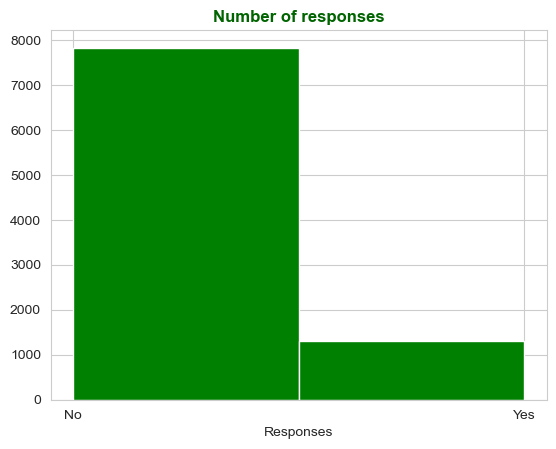

In [121]:
plt.hist(responses, bins=2, color='green')
plt.title('Number of responses',c='darkgreen', fontweight ="bold")  #Ponemos titulo y le cambianos el color
plt.xlabel('Responses')


<font color='orange'> # Show a plot of the response rate by the sales channel. <font>

In [122]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

Text(0.5, 1.0, 'Response Rate by the Sales Channel')

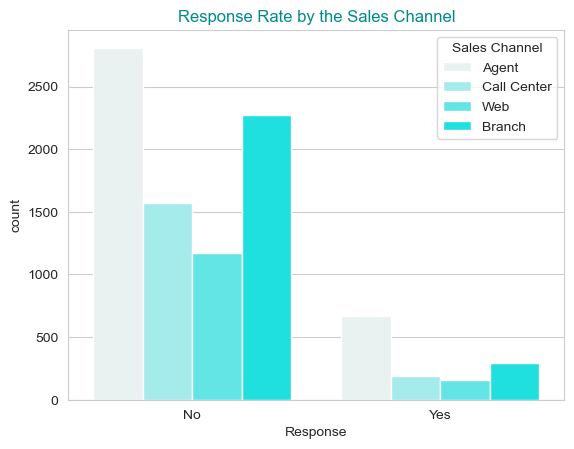

In [123]:
sns.countplot(data=data, x="Response", hue="Sales Channel", color='cyan')
plt.title('Response Rate by the Sales Channel', color='darkcyan')


<font color='orange'> # Show a plot of the response rate by the total claim amount. </font>

Text(0.5, 1.0, 'Response Rate by the Total Claim Amount')

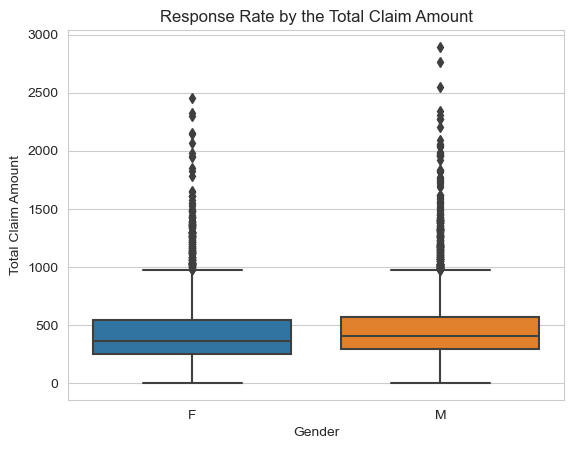

In [124]:
sns.boxplot(data=data, x='Gender', y='Total Claim Amount')
plt.title("Response Rate by the Total Claim Amount")

<font color='orange'> Show a plot of the response rate by income. </font>

Text(0.5, 1.0, 'Response Rate by the Income')

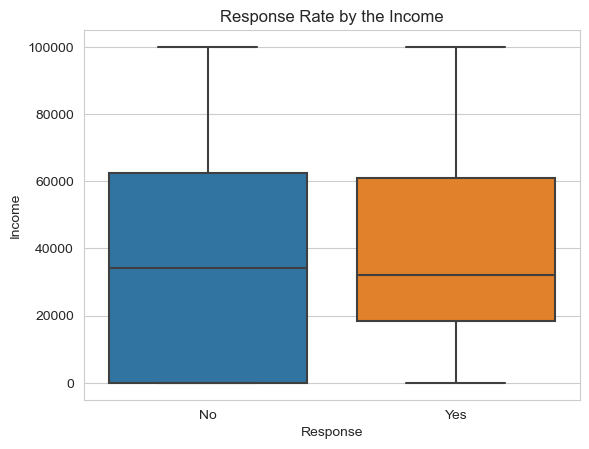

In [125]:
sns.boxplot(data=data, x='Response', y='Income',orient='v' )
plt.title("Response Rate by the Income")

# Lab | Customer Analysis Round 5

<font color='orange'> Processing Data </font>

<font color='orange'>X-y split.</font>

In [126]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [127]:
#Separamos entre lo que son Features/Características y lo que es mi objetivo/target/y(en términos de una recta)
y=data['Total Claim Amount']
X=data.drop(['Total Claim Amount'],axis=1)

In [128]:
#Separar la info que es numércia de la que es categórica
X_num=X.select_dtypes(include=np.number)
X_cat=X.select_dtypes(include=np.object)

C:\Users\monik\AppData\Local\Temp\ipykernel_304\1748241593.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat=X.select_dtypes(include=np.object)


c:\Users\monik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


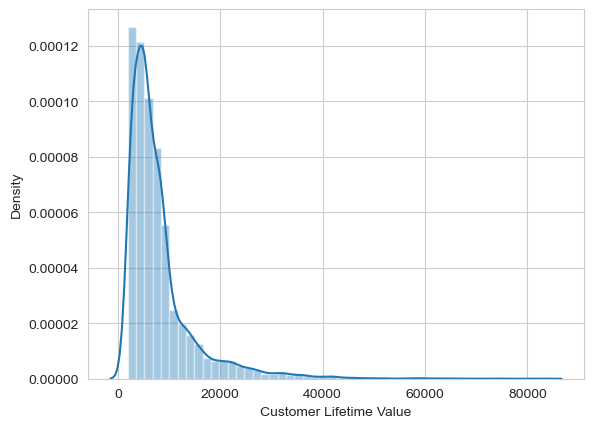

c:\Users\monik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


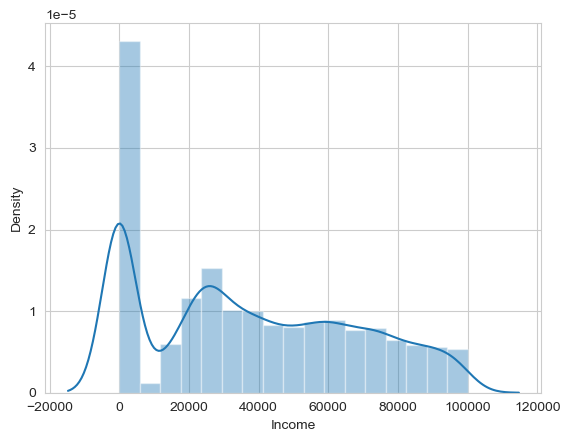

c:\Users\monik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


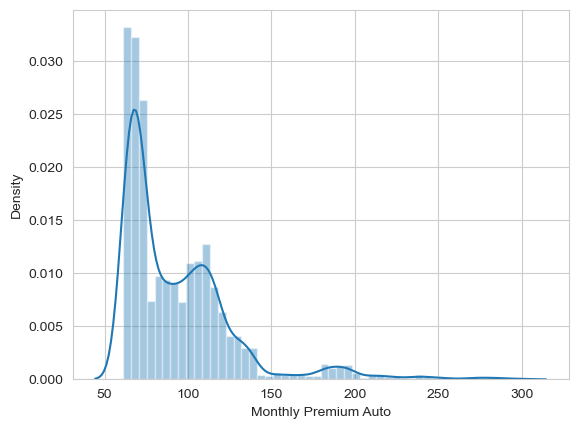

c:\Users\monik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


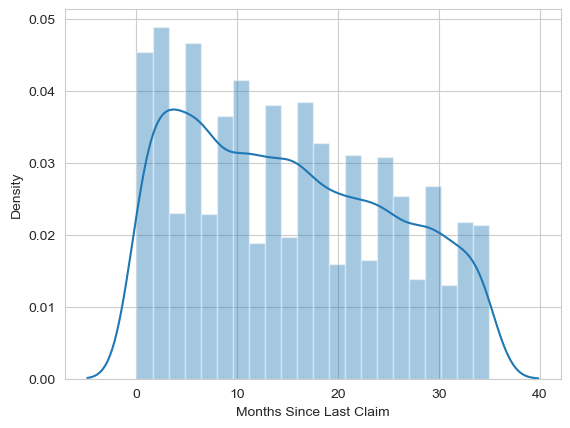

c:\Users\monik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


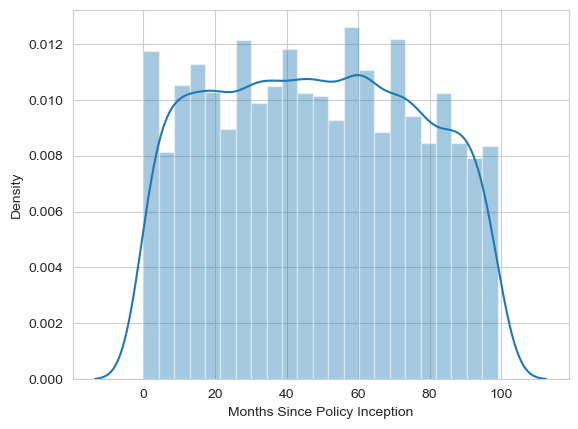

c:\Users\monik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


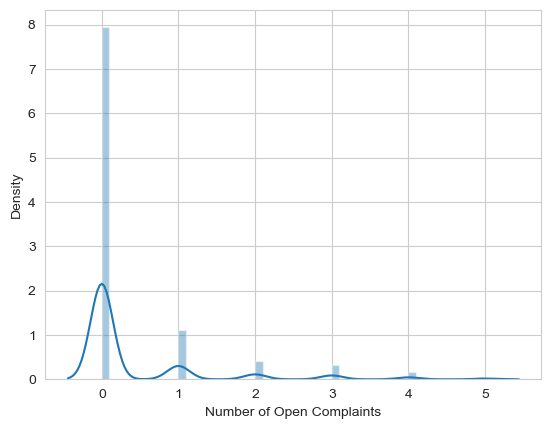

c:\Users\monik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


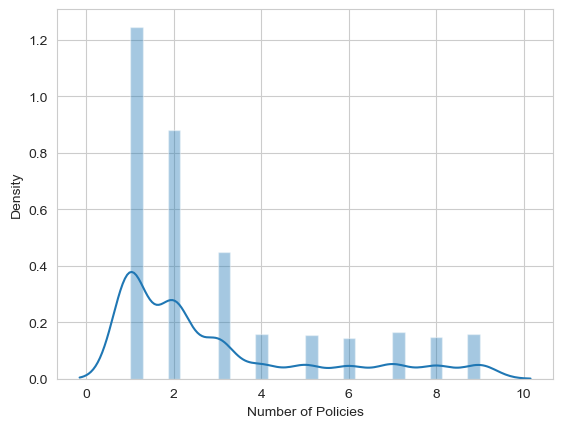

In [129]:
# Vamos a graficar todas nuestras columnas
for i in range(7):
    sns.distplot( X_num.iloc[:,i])
    plt.show()

<font color='orange'> Normalize (numerical). </font>

In [130]:
from sklearn.preprocessing import Normalizer
transformer=Normalizer().fit(X_num)
X_norm=transformer.transform(X_num)

data_norm=pd.DataFrame(X_norm) 

c:\Users\monik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


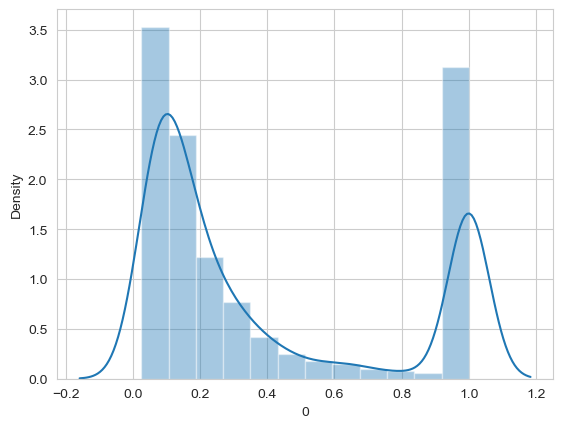

c:\Users\monik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


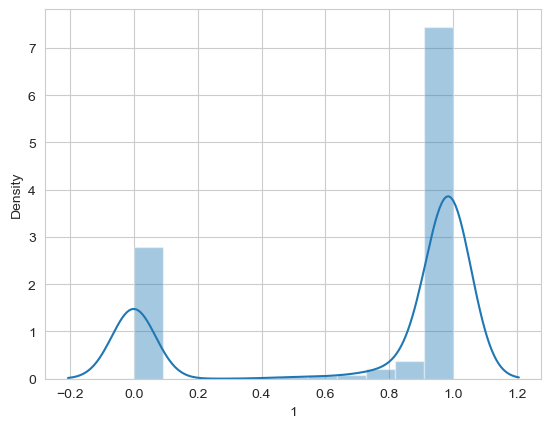

c:\Users\monik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


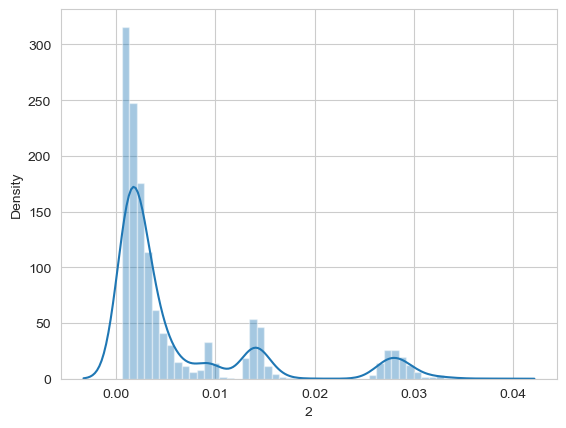

c:\Users\monik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


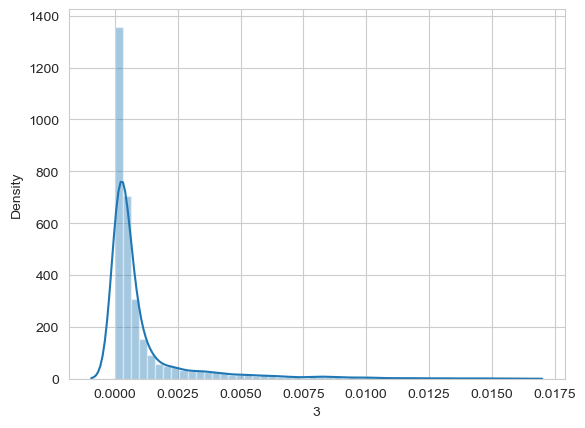

c:\Users\monik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


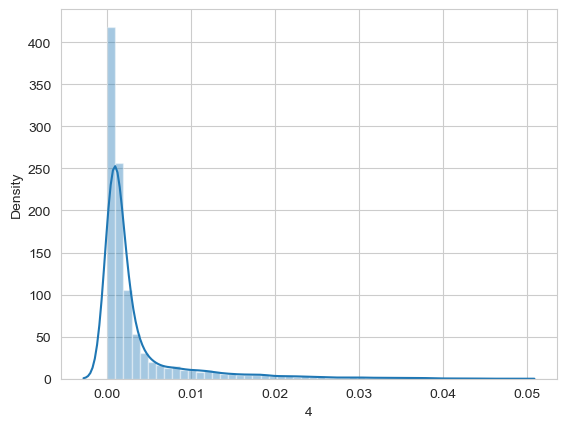

c:\Users\monik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


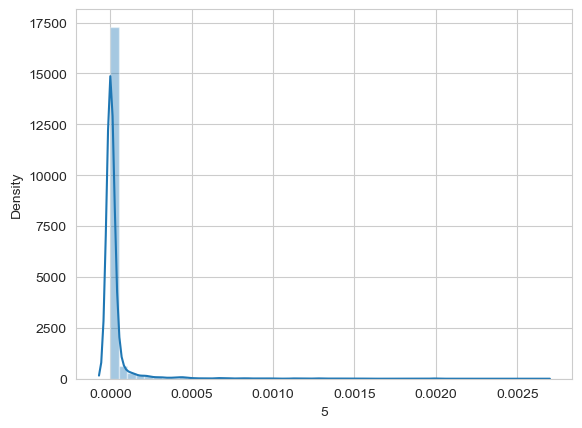

c:\Users\monik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


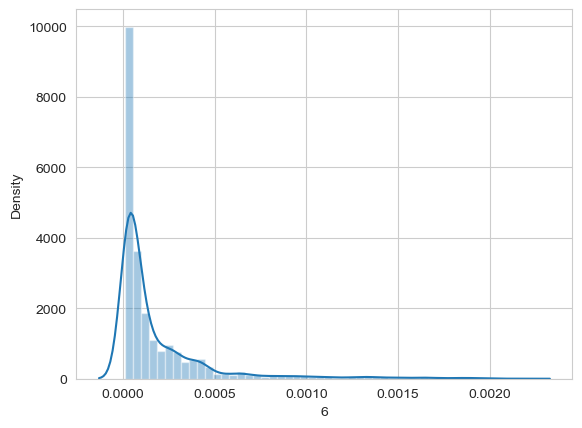

In [131]:
for i in range(7):
    sns.distplot(data_norm.iloc[:,i])
    #cuando queremos que en un momento dado ya nos de el output de la grafica, debemos poner el plt.show(), ssi no, me empalma las graficas
    plt.show()

# Lab | Customer Analysis Round 6

<font color='orange'> One Hot/Label Encoding (categorical). </font>

In [132]:

from sklearn.preprocessing import OneHotEncoder
X_cat

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [133]:
# Usaremos OneHotEncoder para gender y Response

In [134]:
Gender= pd.DataFrame(X_cat['Gender'])
Gender
encoder_gender = OneHotEncoder().fit(Gender)
encoder_gender= encoder_gender.transform( Gender).toarray()
encoder_gender

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [135]:
Response= pd.DataFrame(X_cat['Response'])
Response
encoder_response = OneHotEncoder().fit(Response)
encoder_response= encoder_response.transform( Response).toarray()
encoder_response

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [136]:
# Usaremos Label Encoder para las demas
from sklearn import preprocessing
#State
State=pd.DataFrame(X_cat['State'])
labels=preprocessing.LabelEncoder().fit(State).transform(State)
labels

#Voy a tratar de hacerlo para todas
# Le quito las columnas que ya trate con OneHotEncoder
X_cat2=X_cat.drop(['Gender', 'Response'], axis=1)
X_cat2

c:\Users\monik\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\monik\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Customer,State,Coverage,Education,Effective To Date,EmploymentStatus,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,Basic,Bachelor,2/24/11,Employed,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,Extended,Bachelor,1/31/11,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,Premium,Bachelor,2/19/11,Employed,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,Basic,Bachelor,1/20/11,Unemployed,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,Basic,Bachelor,2/3/11,Employed,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,Basic,Bachelor,2/10/11,Employed,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Extended,College,2/12/11,Employed,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,Extended,Bachelor,2/6/11,Unemployed,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,Extended,College,2/3/11,Employed,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [137]:
#Aplicamos label al resto de columnas
X_cat2=X_cat2.apply(preprocessing.LabelEncoder().fit_transform)

<font color='orange'>Concat DataFrames</font>

In [138]:
# Concatenamos las variables
X=np.concatenate((data_norm,encoder_gender,encoder_response,X_cat2 ),axis=1)
X

array([[4.90491254e-02, 9.98795451e-01, 1.22466656e-03, ...,
        0.00000000e+00, 5.00000000e+00, 1.00000000e+00],
       [9.99888829e-01, 0.00000000e+00, 1.34664469e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.55493903e-01, 9.66807936e-01, 2.14110479e-03, ...,
        0.00000000e+00, 5.00000000e+00, 1.00000000e+00],
       ...,
       [9.99934829e-01, 0.00000000e+00, 1.04110242e-02, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.24391165e-01, 9.45912819e-01, 4.13871886e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.98972589e-01, 0.00000000e+00, 2.94508782e-02, ...,
        2.00000000e+00, 5.00000000e+00, 1.00000000e+00]])

# Linear Regression

<font color='orange'>Train-test split. </font>

In [139]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8, random_state=1)

<font color='orange'> Apply linear regression. </font>

In [140]:
lm=linear_model.LinearRegression()

In [141]:
#Aquí ya ajustamos la maquinaria rpevia
model=lm.fit(X_train,y_train)

In [142]:
predictions=lm.predict(X_test)
predictions2=lm.predict(X_train)

<font color='orange'>R2</font>

In [145]:
#Aquí calculamos el r^2 que nos dice qué tanto se aproximan los datos reales a la recta calculada
R2_1=r2_score(y_test,predictions)
R2_2=r2_score(y_train,predictions2)
print(R2_1)
print(R2_2)
#No es una buena transformacion, necesitariamos usar algun otro tipo

0.38391093379891705
0.3573137531272689


<font color='orange'>MSE: Error Cuadratrico Medio </font>

In [146]:
mse=mean_squared_error(y_test,predictions)
print(mse)
mse2=mean_squared_error(y_train,predictions2)
print(mse2)

51861.86413541026
54748.854733487846


<font color='orange'> RMSE: Raiz del Error Cuadrarico Medio </font>

In [147]:
import math
RMSE1=math.sqrt(mse)
print(RMSE1)
RMSE2=math.sqrt(mse2)
print(RMSE2)

227.7320006837209
233.98473183839977


<font color='orange'> MAE </font>
<font color='orange'> Error Medio Absoluto </font>

In [151]:
def mae(y_train, predictions):
    y_train, predictions = np.array(y_train), np.array(predictions)
    return np.mean(np.abs(y_train - predictions))

mae1=mae(y_test,predictions)

mae2=mae(y_train,predictions2)

print(mae1)
print(mae2)

#Mismo error que arriba, no me permite usar el y_train por la diferencia de muestras

160.3278055769529
162.77573843421015
